This notebook shows how `emf.subcalc` makes use of template files to store modeling information. The first template file, a tower template, is used to store information relating to towers supporting power lines, which is read into `Tower` objects for use by a `Model` object. the second template, a footprint template, stores the coordinates of objects in the model domain that will be included in map-style plots (contour and colormesh).

Empty versions of each template can be generate with `emf.subcalc.drop_tower_template()` and `emf.subcalc.drop_footprint_template()`.

In [1]:
import emf.subcalc as sc
%matplotlib inline

First we use the `load_towers` function to read the tower template into `Tower` objects. The tower template we'll use is towers.csv, in this same directory. Tower templates are fairly simple. Each `Tower` object is defined by a unique "group" and "sequence" combination. Towers with the same "group" are carrying the same circuit, with the ordering in each group defined by the "sequence" input. Each tower has x and y coordiates, a rotation angle, and a row for the coordinates and loading of its wires. Our template only has a single circuit in it, so there is only one "group" used for all the towers.

The `load_towers` function returns a list of `Tower` objects by default, but we can tell it to return a fresh `Model` object containing all of the new `Towers` by passing `True` in the second argument.

In [2]:
mod = sc.load_towers('towers.csv', True)

print(mod)

Model object
    name: 'unnamed-model'
    x limits: 447.199 to 2008.07 ft
    y limits: 208.927 to 1163 ft
    sample height (z): 3.28 ft
    total samples: 100440
    sample spacing: 3.85901 ft
    number of Tower objects: 8
    number of Tower groups: 1
    tower group names: 'Power Line'
    number of Condutor objects: 0
    total number of wire segments: 21


Success. It takes some work to assemble the tower template (reading schematics, digitizing coordinates, etc.),  but the modeling process is quite simple once the template is compiled.

Let's drop the resolution a little bit (increase the spacing), set the model domain limits manually, and run the calculations by calling the `Model` object's `calculate` method.

In [3]:
mod.spacing = 3
mod.xlim = 200, 2200
mod.ylim = 0, 1400

res = mod.calculate()

print(res)

all calculations complete. total calculation time: 5.146 seconds.
Results object
    name: 'unnamed-results'
    components/Bkeys: 'Bmax', 'Bres', 'By', 'Bz', 'Bx'
    active component/Bkey: 'Bmax'
    Bmax range: 0.075111 to 56.8365 mG
    x limits: 200 to 2201 ft
    y limits: 0 to 1401 ft
    total samples: 312624
    sample spacing: 3 ft
    number of Footprints: 1
    Footprint groups: 'Power Line'


We have the results. Before making plots, we want to associate our results object with the footprint template. Our template is called footprints.csv and it is formatted much like the tower template. Each footprint has a unique "group" and "name" combination. Footprints in the same group are labeled collectively in the plots. To get our footprints into the results, we simple call the `load_footprints` method of the `Results` object.

In [4]:
res.load_footprints('footprints.csv', clear=False)

print(res)

Results object
    name: 'unnamed-results'
    components/Bkeys: 'Bmax', 'Bres', 'By', 'Bz', 'Bx'
    active component/Bkey: 'Bmax'
    Bmax range: 0.075111 to 56.8365 mG
    x limits: 200 to 2201 ft
    y limits: 0 to 1401 ft
    total samples: 312624
    sample spacing: 3 ft
    number of Footprints: 10
    Footprint groups: 'Plant', 'Switchyard', 'Nearby Lots and Buildings', 
                      'Power Line', 'Railway', 'Road'


The new footprints are now showing up in the `Results` and we can make some fancy plots.

plot saved to: contour-plot.png
plot saved to: pcolormesh-plot.png


(<matplotlib.figure.Figure at 0x103cfdb0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x104b2fd0>)

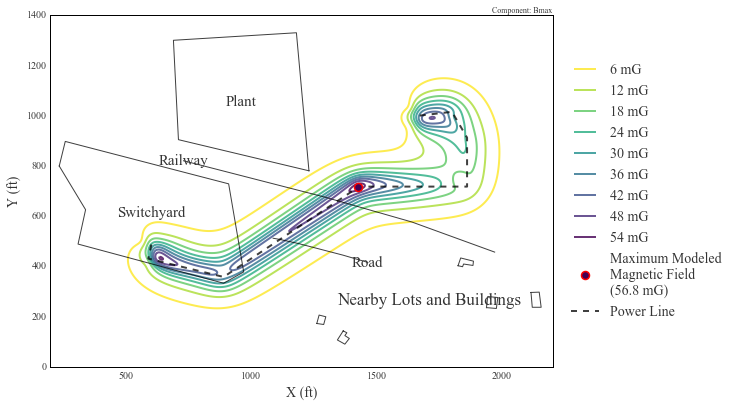

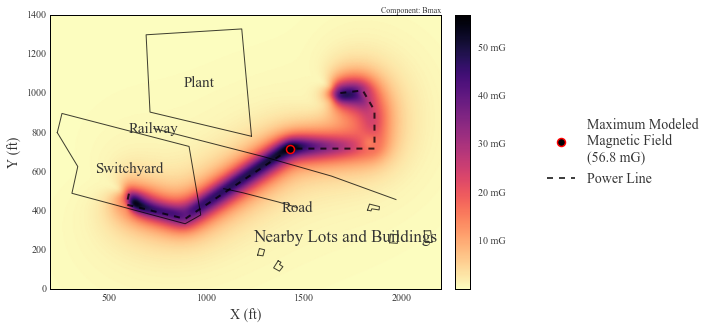

In [5]:
sc.ion()
sc.plot_contour(res, save=True)
sc.plot_pcolormesh(res, save=True)